Pandas: Explode

In [2]:
#Importing Libraries 

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#Loading Data 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup 

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df_exploded = df.explode(column='job_skills')

df_exploded.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


<Axes: xlabel='job_skills'>

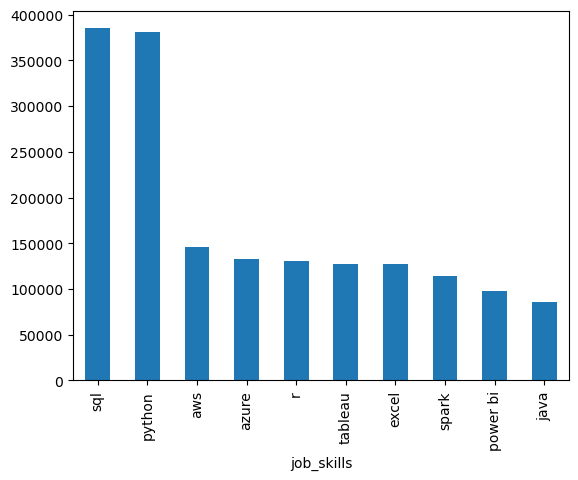

In [10]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [14]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [20]:
df_skills_count = skills_count.reset_index(name='skill_count')

df_skills_count = df_skills_count.sort_values(by = 'skill_count', ascending = False)

df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


<Axes: ylabel='job_skills'>

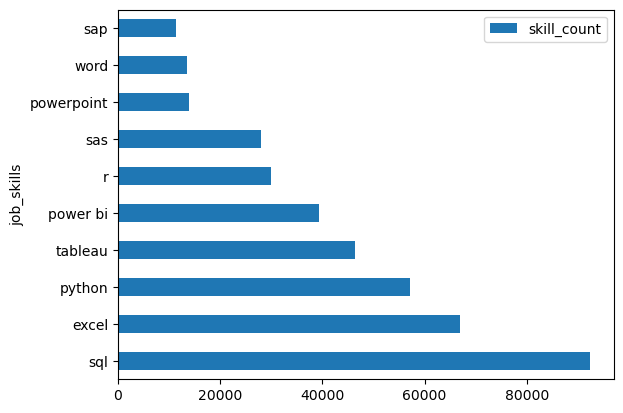

In [30]:
job_title = 'Data Analyst'
top_skills = 10 

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skills_final.plot(kind='barh', x='job_skills', y='skill_count')



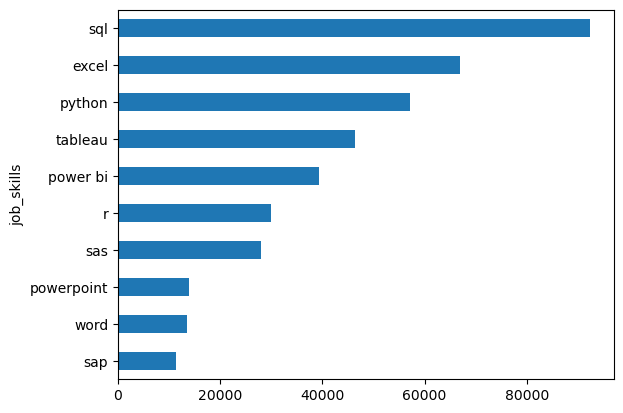

In [32]:
df_skills_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.legend().set_visible(False)